In [1]:
import pandas as pd
from macd import *
from simulation import Simulation
import os

In [2]:
def import_data(filename):
    base_path = ''
    file = filename + '.csv'
    file_path = os.path.join(base_path, file)
    wig20_data = pd.read_csv(file_path)
    
    wig20_data['Max.'] = wig20_data['Max.'].str.replace('.','')
    wig20_data['Max.'] = wig20_data['Max.'].str.replace(',','.').astype(float)
    
    wig20_data['Min.'] = wig20_data['Min.'].str.replace('.','')
    wig20_data['Min.'] = wig20_data['Min.'].str.replace(',','.').astype(float)
    
    wig20_data['Otwarcie'] = wig20_data['Otwarcie'].str.replace('.','')
    wig20_data['Otwarcie'] = wig20_data['Otwarcie'].str.replace(',','.').astype(float)
    
    wig20_data['Ostatnio'] = wig20_data['Ostatnio'].str.replace('.','')
    wig20_data['Ostatnio'] = wig20_data['Ostatnio'].str.replace(',','.').astype(float)
    
    wig20_data['Data'] = pd.to_datetime(wig20_data['Data'],format='%d.%m.%Y')
    
    wig20_data = wig20_data[::-1]

    list_data = wig20_data['Ostatnio']
    list_data = pd.Series.tolist(list_data)
    return wig20_data, list_data
 


In [3]:
wig20, list_data = import_data('WIG20_data')

money_amount = 1000
macd = calculate_MACD(list_data)
signal = calculate_signal(macd)
simulator = Simulation(money_amount, macd[8:len(macd)], signal)
simulator.macd_transactions(0.3, list_data[33:len(list_data)],36)

saldo after buying:  311.49699999999996
saldo after selling:  1000.2939999999999
saldo after buying:  301.51599999999985
saldo after selling:  1006.7889999999998
saldo after buying:  284.35599999999977
saldo after selling:  1039.5909999999997
saldo after buying:  298.7379999999996
saldo after selling:  1064.2719999999995
saldo after buying:  322.2459999999995
saldo after selling:  1056.7809999999995
saldo after buying:  306.36099999999954
saldo after selling:  1053.2109999999996
saldo after buying:  322.8279999999995
saldo after selling:  1103.3739999999996
saldo after buying:  381.4299999999996
saldo after selling:  1096.2669999999996
saldo after buying:  361.3299999999996
saldo after selling:  1074.9459999999995
saldo after buying:  393.3669999999995
saldo after selling:  1082.8269999999993
saldo after buying:  420.03099999999927
saldo after selling:  1056.2559999999994
saldo after buying:  394.89699999999937
saldo after selling:  1076.7159999999994
saldo after buying:  380.343999999

<ipython-input-2-a443e8a1fc87>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  wig20_data['Max.'] = wig20_data['Max.'].str.replace('.','')
<ipython-input-2-a443e8a1fc87>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  wig20_data['Min.'] = wig20_data['Min.'].str.replace('.','')
<ipython-input-2-a443e8a1fc87>:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  wig20_data['Otwarcie'] = wig20_data['Otwarcie'].str.replace('.','')
<ipython-input-2-a443e8a1fc87>:16: FutureWarning: The default value of regex will change from True 

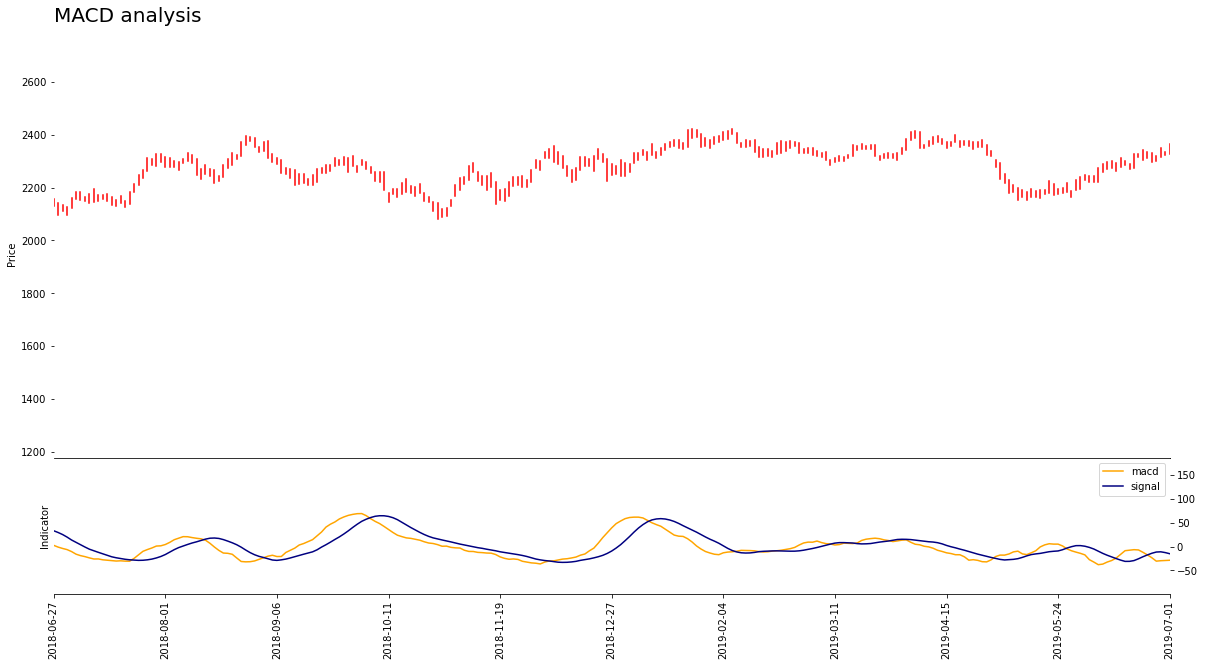

,Data,Ostatnio,Otwarcie,Max.,Min.,Wol.,Zmiana%
999,2017-02-23,2256.01,2249.81,2272.01,2241.82,"26,06M","0,22%"
998,2017-02-24,2212.04,2252.39,2253.93,2202.39,"29,66M","-1,95%"
997,2017-02-27,2210.26,2212.87,2223.76,2199.40,"18,27M","-0,08%"
996,2017-02-28,2191.25,2214.22,2216.98,2187.79,"32,15M","-0,86%"
995,2017-03-01,2253.96,2195.25,2259.60,2195.25,"33,22M","2,86%"


In [4]:
wig20_copy = wig20[33:].copy().reset_index(drop=True)
plot_data(300,550, macd[8:], signal, wig20_copy)